In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the count vectorized data
count_vect_df = pd.read_csv('../data/count_vectorized_notes.csv')
count_vect_df.head()

,absinthe,absolute,acai,accia,accord,acerola,acetate,acetylfuran,acid,african,...,xtreme,yarrow,yellow,ylang,yogurt,yuzu,zdravetz,zefir,zest,zinnia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Add the names of the fragrances to the DataFrame
fragrance_names = pd.read_csv('../data/fra_cleaned.csv', sep=';', encoding_errors='ignore')
count_vect_df['name'] = fragrance_names['Perfume']
# Create a co-occurrence matrix
# The co-occurrence matrix is the dot product of the count vectorized DataFrame with itself
# This will give us a matrix where each cell (i, j) indicates the number of times
# the terms i and j co-occur in the same fragrance

co_occurrence_matrix = (count_vect_df.drop('name', axis=1).T @ count_vect_df.drop('name', axis=1)).values
co_occurrence_matrix_df = pd.DataFrame(co_occurrence_matrix, index=count_vect_df.columns[1:], columns=count_vect_df.columns[1:])
co_occurrence_matrix_df.head()


,absolute,acai,accia,accord,acerola,acetate,acetylfuran,acid,african,agarwood,...,yarrow,yellow,ylang,yogurt,yuzu,zdravetz,zefir,zest,zinnia,name
absolute,55,0,0,0,0,0,0,0,0,0,...,0,0,0,16,0,1,0,0,0,0
acai,0,28,0,0,0,0,0,0,0,0,...,0,0,2,6,0,0,0,0,0,0
accia,0,0,21,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
accord,0,0,0,21,0,0,0,0,0,0,...,0,0,0,14,0,0,0,0,0,0
acerola,0,0,0,0,58,0,0,1,0,0,...,0,0,0,6,0,0,0,0,0,0


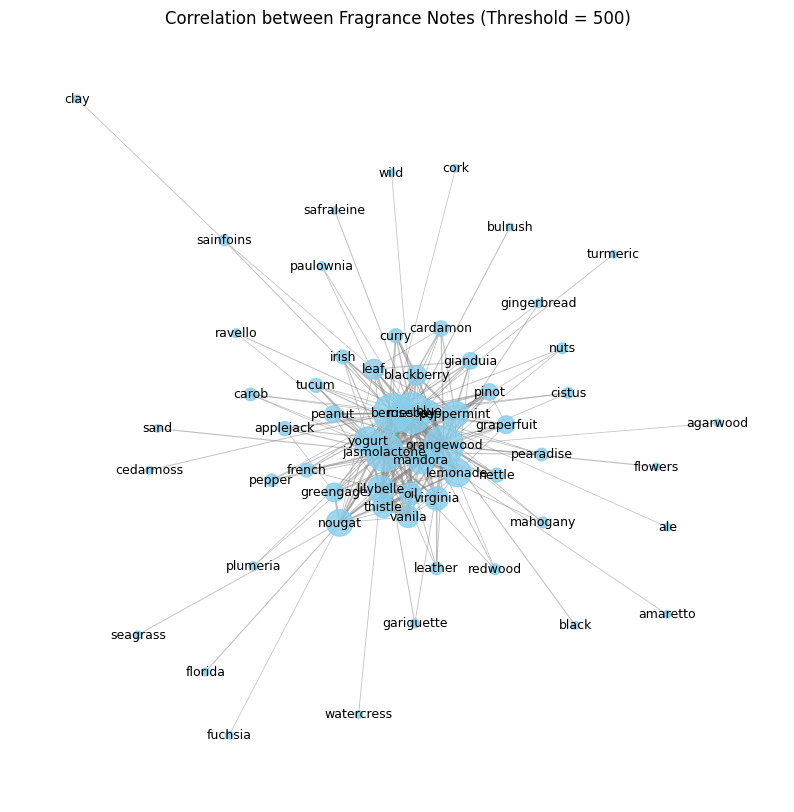

In [ ]:
# Set the diagonal to 0 so that self-loops are removed
np.fill_diagonal(co_occurrence_matrix_df.values, 0)

# Create a graph from the co-occurrence matrix
G = nx.from_pandas_adjacency(co_occurrence_matrix_df)
threshold = 500  # increased threshold
edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < threshold]
G.remove_edges_from(edges_to_remove)
G.remove_nodes_from(list(nx.isolates(G)))
node_sizes = [max(G.degree(n) * 20, 30) for n in G.nodes()]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', alpha=0.8, node_size=node_sizes)
edge_width = [d['weight'] * 0.001 for (u, v, d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.5, edge_color='gray')
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_family='sans-serif')
plt.title("Correlation between Fragrance Notes (Threshold = {})".format(threshold))
plt.axis('off')
plt.show()